In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, matthews_corrcoef

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
EC=pd.read_csv('/content/drive/MyDrive/MScProject/online_shoppers_intention.csv')
EC.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
variable=['Weekend','Revenue']
for col in variable:
    encoder = LabelEncoder()
    encoder.fit(EC[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    EC[col] = encoder.fit_transform(EC[col])


Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [ ]:
EC['Month'] = EC['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [ ]:
MMC = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
EC[MMC] = scaler.fit_transform(EC[MMC])

In [ ]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
#encoder.fit(df['category'])
# Fit and transform the categorical variable
EC['VisitorType'] = label_encoder.fit_transform(EC['VisitorType'])

EC.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [ ]:
X = EC.drop('Revenue', axis=1)
y = EC['Revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Train the model on the training dataset
lgb_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = lgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



print(classification_report(y_test, y_pred))
# Make predictions on the testing set
y_pred_proba = lgb_classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC Score:", mcc)

[LightGBM] [Info] Number of positive: 1497, number of negative: 8367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 9864, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151764 -> initscore=-1.720832
[LightGBM] [Info] Start training from score -1.720832
Accuracy: 0.8913219789132197
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2055
           1       0.72      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.88      0.89      0.89      2466

AUC Score: 0.9248554057814007
MCC Score: 0.5803992089549403


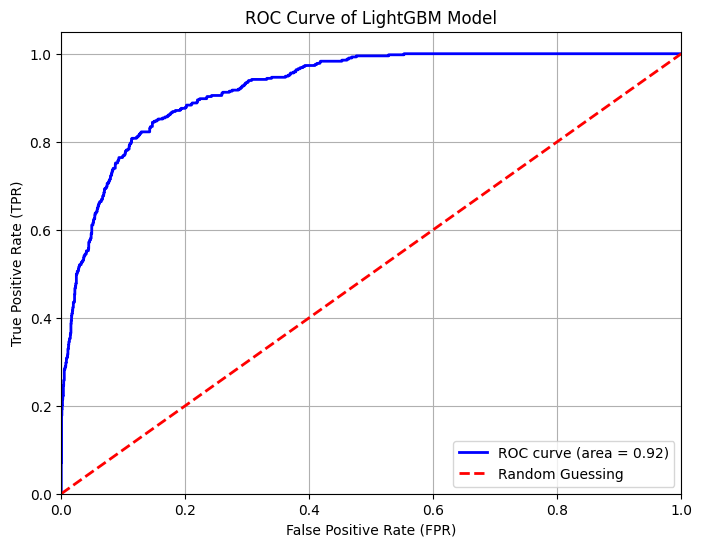

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_score contains the predicted probabilities of the positive class
# Replace y_true and y_score with your actual data

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of LightGBM Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

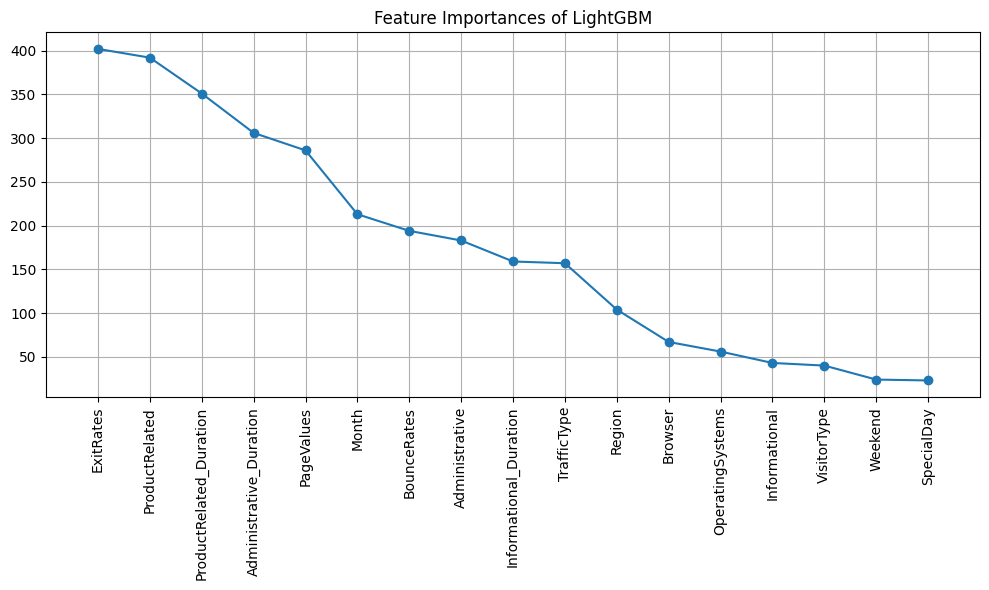

In [ ]:
importances = lgb_classifier.feature_importances_

# Get feature names
feature_names = X_trainn.columns  # Assuming you have column names

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances of LightGBM")
plt.plot(range(X_train.shape[1]), importances[indices], marker='o', linestyle='-')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_trainn, y_trainn)
y_pred = lgb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))

# Make predictions on the testing set
y_pred_proba = lgb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)

[LightGBM] [Info] Number of positive: 8315, number of negative: 8360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2152
[LightGBM] [Info] Number of data points in the train set: 16675, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498651 -> initscore=-0.005397
[LightGBM] [Info] Start training from score -0.005397
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2062
           1       0.92      0.93      0.93      2107

    accuracy                           0.93      4169
   macro avg       0.93      0.93      0.93      4169
weighted avg       0.93      0.93      0.93      4169

AUC Score: 0.9805799521892983
MCC Score: 0.8532234329369764


In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'num_leaves':[31],
}

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
lgb_classifier = lgb.LGBMClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset (X_train and y_train combined)
lgb_classifier.fit(X_train, y_train)

# Make predictions on the test dataset (X_test)
y_pred = lgb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
# Make predictions on the testing set
y_pred_proba = lgb_classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC Score:", mcc)

[LightGBM] [Info] Number of positive: 1497, number of negative: 8367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 9864, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151764 -> initscore=-1.720832
[LightGBM] [Info] Start training from score -1.720832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'num_leaves':[31],
}

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_trainn, y_trainn)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
lgb_classifier = lgb.LGBMClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset (X_train and y_train combined)
lgb_classifier.fit(X_trainn, y_trainn)

# Make predictions on the test dataset (X_test)
y_pred = lgb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))
# Make predictions on the testing set
y_pred_proba = lgb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8315, number of negative: 8360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2152
[LightGBM] [Info] Number of data points in the train set: 16675, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498651 -> initscore=-0.005397
[LightGBM] [Info] Start training from score -0.005397
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 5, 'num_leaves': 31, 'subsample': 0.6}
Best Accuracy Score: 0.9261769115442279
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'm

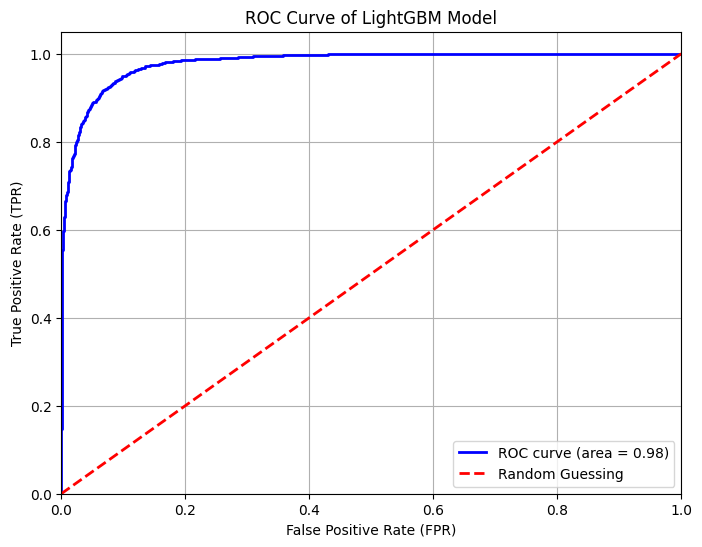

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_score contains the predicted probabilities of the positive class
# Replace y_true and y_score with your actual data

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_testt, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of LightGBM Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

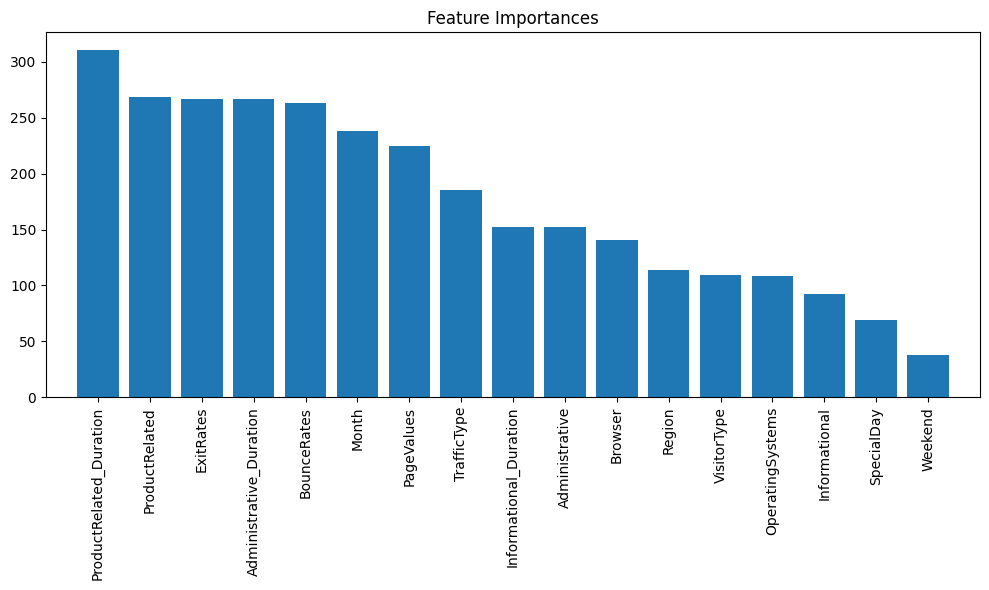

In [ ]:
importances = lgb_classifier.feature_importances_

# Get feature names
feature_names = X_trainn.columns  # Assuming you have column names

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of LightGBM")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()